In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from osgeo import gdal_array
from osgeo import gdal
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
output2010 = pd.read_csv(r'C:\ITC\ABM\CASE STUDY_\TRY\tick_2010_new.csv', header=None)
array2010 = output2010.to_numpy()
array2010[np.isnan(array2010)] = 0

In [3]:
Y = array2010[:,0] # Y is patch_bite_count
X = array2010[:,1:] # X are 9 variables, which are PBC, landuse,PAC, Tick_abundance, Working, Gardening, Picnic, Hiking, Playing, Sunbathing


In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, train_size=0.7)
# Use linear regression to investigate the importance of the given parameters
lm = LinearRegression( fit_intercept=True, normalize=False, copy_X=True, n_jobs=1 )
lm.fit(xtrain, ytrain)
ypred = lm.predict(xtest)
print("LM: ", r2_score(ytest, ypred))

LM:  0.26799902936378206


Feature ranking:
1. feature 2 (0.336741)
2. feature 1 (0.173816)
3. feature 4 (0.093664)
4. feature 8 (0.091188)
5. feature 5 (0.087310)
6. feature 7 (0.082873)
7. feature 6 (0.082500)
8. feature 0 (0.051907)
9. feature 3 (0.000000)


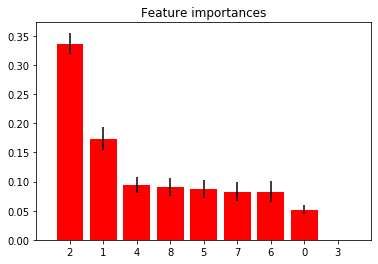

In [5]:
rf = RandomForestRegressor(
    n_estimators=100, 
    criterion="mse", 
    max_depth=None, 
    max_features="auto", 
    bootstrap=True, 
    min_samples_split=2, 
    n_jobs=1) 
rf.fit(xtrain, ytrain) 
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(xtrain.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(xtrain.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(xtrain.shape[1]), indices)
plt.xlim([-1, xtrain.shape[1]])
plt.show()

In [6]:
# Here we only consider human activites which would make people be bitten, to get the feature importance of each activity.
Y2 = array2010[:,0] # Using patch_bite_count as train model.
X2 = array2010[:,4:] # Using human activities as test model. Human activities which affect people being bitten, which are Working, Gardening, Picnic, Hiking, Playing, Sunbathing
x2train, x2test, y2train, y2test = train_test_split(X2, Y2, test_size=0.3, train_size=0.7) 
lm = LinearRegression( fit_intercept=True, normalize=False, copy_X=True, n_jobs=1 )
lm.fit(x2train, y2train)
y2pred = lm.predict(x2test)
print("LM: ", r2_score(y2test, y2pred))

LM:  0.04139963141553238


Feature ranking:
1. feature 5 (0.222177)
2. feature 1 (0.204469)
3. feature 4 (0.199089)
4. feature 2 (0.188169)
5. feature 3 (0.186096)
6. feature 0 (0.000000)


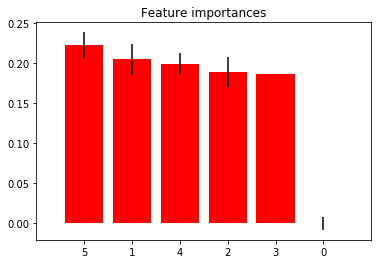

In [7]:
rf2 = RandomForestRegressor(
    n_estimators=100, 
    criterion="mse", 
    max_depth=None, 
    max_features="auto", 
    bootstrap=True, 
    min_samples_split=2, 
    n_jobs=1) 
rf2.fit(x2train, y2train) 
importances = rf2.feature_importances_
std2 = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x2train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x2train.shape[1]), importances[indices],
       color="r", yerr=std2[indices], align="center")
plt.xticks(range(x2train.shape[1]), indices)
plt.xlim([-1, x2train.shape[1]])
plt.show()